In [1]:
import numpy as np
from glob import glob

import des_utils
import des_io

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'

In [2]:
reload(des_utils)

<module 'des_utils' from 'des_utils.pyc'>

In [3]:
sim_files = glob("../ZD_KNDES_TEST/*DAT")
sim_triggers, sim_colors, sim_ifluxes,simdets,SNIDset = des_utils.extract_colors(sim_files)

des_utils.py:64: RuntimeWarning: invalid value encountered in log10
  colors[i] = -2.5*(np.log10(iflux1)-np.log10(zflux1))


In [4]:
f = open("../OUT_KNANA_SIM.KNTABLE.TEXT","r")
SNset2=set()
for line in f:
    linelist = line.split()
    if (not linelist):
        continue
    elif linelist[0] == 'SN:':
        SNset2.add(linelist[1])    
    
print list(set(SNIDset)-set(SNset2))
print list(set(SNset2)-set(SNIDset))

['9617', '4393', '199', '2472', '7285', '9090', '5033', '9360', '4628', '4169', '6176', '7912', '5703', '4343', '1712', '2881', '3553', '4940', '6786', '3123', '2224', '2079', '4907', '4384', '939', '1758', '1025', '6825', '1738', '1267', '2642', '565', '8200', '1318', '9664', '6911', '3155', '9765', '7786', '6528', '269', '7648', '223', '1069', '8957', '5089', '5181', '1046', '782', '1189', '3012', '7587', '1126', '2670', '2145', '7180', '1479', '1380', '8833', '3075']
['4310', '8388', '5178', '4325', '392', '238', '3539', '87', '5385', '7619', '1427', '4383', '2888', '7472', '5966', '5029', '583', '3873', '5735', '4441', '8249', '3074', '8554', '4111', '1912', '5514', '7714', '1609', '4529', '4434', '5634', '1062', '6358', '1606']


In [5]:
print "{} triggers out of {} files".format(np.sum(sim_triggers), len(sim_triggers))
print simdets

596 triggers out of 1001 files
199


-170.1494 1826.2722


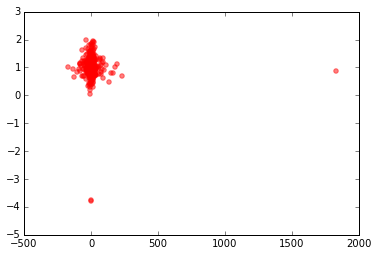

In [6]:
plt.scatter(sim_ifluxes[sim_triggers], sim_colors[sim_triggers], alpha=0.5, color='r')
print sim_ifluxes[sim_triggers].min(), sim_ifluxes[sim_triggers].max()
xlow, xhigh = plt.xlim()

In [7]:
data_files = glob("../DESY1_numepoch1_iz_real_text/*.dat")
data_triggers, data_colors, data_ifluxes,data_dets,SNIDset = des_utils.extract_colors(data_files)

des_utils.py:45: RuntimeWarning: invalid value encountered in greater_equal
  iSNRpass = iSNR >= 5


In [8]:
print sum(data_triggers)
print data_dets

65
26


(-1, 2)

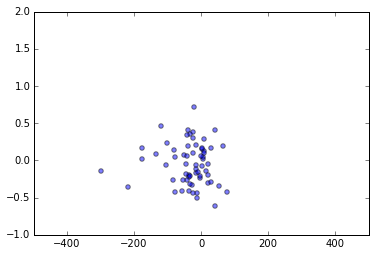

In [9]:
plt.scatter(data_ifluxes[data_triggers], data_colors[data_triggers], alpha=0.5)
plt.xlim(-500, 500)
plt.ylim(-1, 2)

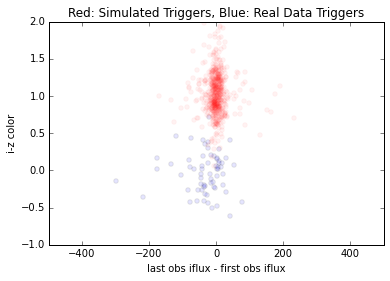

In [16]:
plt.scatter(data_ifluxes[data_triggers], data_colors[data_triggers], alpha=0.1)
plt.scatter(sim_ifluxes[sim_triggers], sim_colors[sim_triggers], alpha=0.05, color='r')
plt.xlim(-500, 500)
plt.ylim(-1, 2)
plt.title("Red: Simulated Triggers, Blue: Real Data Triggers")
plt.xlabel("last obs iflux - first obs iflux")
plt.ylabel("i-z color")